<a href="https://colab.research.google.com/github/JRcepeda/Proyectos/blob/main/An%C3%A1lsiis_de_correspondencia_aplicaciones_competidoras_playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install google_play_scraper

In [2]:
pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 35.8 MB/s eta 0:00:00


In [ ]:
pip install prince

In [ ]:
import prince

In [3]:
import stanza
stanza.download('es')
nlp=stanza.Pipeline('es')

INFO:stanza:Downloading default packages for language: es (Spanish) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor    | Package         |
----------------------------------
| tokenize     | ancora          |
| mwt          | ancora          |
| pos          | ancora_charlm   |
| lemma        | ancora_nocharlm |
| constituency | combined_charlm |
| depparse     | ancora_charlm   |
| sentiment    | tass2020        |
| ner          | conll02         |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [4]:
from google_play_scraper import app, Sort, reviews_all
import numpy as np
import pandas as pd
import re
import nltk
import numpy
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [5]:
from nltk.stem import SnowballStemmer
spanish_stemmer = SnowballStemmer('spanish')

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [7]:
from typing import DefaultDict

In [8]:
from matplotlib import pyplot as plt

In [9]:
import emoji

In [10]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [11]:
aplicaciones={'Cookpad':'com.mufumbo.android.recipe.search',
              'MyFitnessPal':'com.myfitnesspal.android',
              'MyrealFood: Recetas y dietas':'es.myrealfood.myrealfood',
              'ekilu - Recetas saludables':'es.nooddle',
              'Samsung Food':'com.foodient.whisk',
              'My Recipe Box : Recette Tek':'fr.recettetek',
              'Recipe Keeper':'com.tudorspan.recipekeeper',
              'Plan Meals - Meal Planner':'com.oneabsolute.mealplanner',
              'Nestlé Cocina. Recetas y Menús':'com.mubiquo.nestlecocina',
              'Tasty':'com.buzzfeed.tasty',
              'Yummly':'com.yummly.android'
              #'Kitchen Stories: Recipes':'com.ajnsnewmedia.kitchenstories'
              }

In [12]:
g_reviews=DefaultDict(list)
for i in aplicaciones:
  g = reviews_all(
        aplicaciones[i],
        sleep_milliseconds=0, # defaults to 0
        lang='es', # defaults to 'en'
        country='co', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )
  g_reviews[i].extend(g)


In [13]:
cookpad=pd.DataFrame(g_reviews['Cookpad'])
cookpad['Aplicacion']='Cookpad'

MyFitnessPal=pd.DataFrame(g_reviews['MyFitnessPal'])
MyFitnessPal['Aplicacion']='MyFitnessPal'

MyrealFood=pd.DataFrame(g_reviews['MyrealFood: Recetas y dietas'])
MyrealFood['Aplicacion']='MyrealFood: Recetas y dietas'

ekilu=pd.DataFrame(g_reviews['ekilu - Recetas saludables'])
ekilu['Aplicacion']='ekilu - Recetas saludables'

samsung=pd.DataFrame(g_reviews['Samsung Food'])
samsung['Aplicacion']='Samsung Food'

myrecipe=pd.DataFrame(g_reviews['My Recipe Box : Recette Tek'])
myrecipe['Aplicacion']='My Recipe Box : Recette Tek'

recipe=pd.DataFrame(g_reviews['Recipe Keeper'])
recipe['Aplicacion']='Recipe Keeper'

meals=pd.DataFrame(g_reviews['Plan Meals - Meal Planner'])
meals['Aplicacion']='Plan Meals - Meal Planner'

nestle=pd.DataFrame(g_reviews['Nestlé Cocina. Recetas y Menús'])
nestle['Aplicacion']='Nestlé Cocina. Recetas y Menús'

tasty=pd.DataFrame(g_reviews['Tasty'])
tasty['Aplicacion']='Tasty'

yummly=pd.DataFrame(g_reviews['Yummly'])
yummly['Aplicacion']='Yummly'

In [14]:
df1=pd.concat([cookpad,MyFitnessPal,MyrealFood,ekilu,samsung,myrecipe,recipe,meals,nestle,tasty,yummly],axis=0)

In [15]:
df1.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
df1.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
result = df1

In [16]:
result=result[(result['rating']>=4)&(result['review_date'].dt.year>2020)][['Aplicacion','review_description']]

In [17]:
result.head()

,Aplicacion,review_description
0,Cookpad,Maravillosa. Me ha ayudado mucho. 🥰
1,Cookpad,"Me gusta mucho Guardo mis.propias recetas,así ..."
2,Cookpad,Recetas muy ricas
3,Cookpad,Siempre encuentras buenas ideas!!!
4,Cookpad,Muy buena


In [18]:
datos=result.copy()

In [19]:
def clean(x):
  emoji_patron = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticonos
                             u"\U0001F300-\U0001F5FF"  # símbolos y pictogramas
                             u"\U0001F680-\U0001F6FF"  # transporte y mapas
                             u"\U0001F700-\U0001F77F"  # alquimia
                             u"\U0001F780-\U0001F7FF"  # emoticonos adicionales
                             u"\U0001F800-\U0001F8FF"  # símbolos de letras chinas
                             u"\U0001F900-\U0001F9FF"  # símbolos de matemáticas
                             u"\U0001FA00-\U0001FA6F"  # símbolos de ajedrez
                             u"\U0001FA70-\U0001FAFF"  # cartas de juego
                             u"\U00002702-\U000027B0"  # emoticonos variados
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
  x=x.lower()
  x = re.sub(r"https?\://\S+",' ', x)
  regex = '[\!\"\#\$\%\&\\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^_\`\{\|\}\~]'
  x=re.sub(regex,' ',x)
  x = re.sub(r'\<a href', ' ', x)
  x = emoji_patron.sub(r'',x)
  x = re.sub(r'&amp;', 'and', x)
  x = re.sub(r'<br />', ' ', x)
  x = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', x)
  x = re.sub('\d','', x)
  x = re.sub(r"can\'t", "cannot", x)
  x = re.sub(r"it\'s", "it is", x)
  return x

In [20]:
datos['Rplicacion_Clean']=datos['review_description'].apply(lambda x: clean(str(x)))

In [21]:
stopw=stopwords.words("spanish")+['Si','si','le','para','app','solo','bien','él',
                                  'poner','hacer','dar','dejar','ahora','aplicación',
                                  'aplicacion','ir','decir','error','dar','el',
                                  'poder','buen','poner','abrir','que','yo','vez',
                                  'tener','querer','hacer','Ir','cosa','cada','i',
                                  'salir','ver','q','ser','asi','además','usar']+stopwords.words('english')

In [22]:
remove=lambda x: [[word for word in word_tokenize(sentence) if word not in stopw ]for sentence in sent_tokenize(x)]

In [23]:
datos['Rplicacion_Clean']=datos['Rplicacion_Clean'].apply(remove)

In [24]:
datos.head()

,Aplicacion,review_description,Rplicacion_Clean
0,Cookpad,Maravillosa. Me ha ayudado mucho. 🥰,"[[maravillosa, ayudado]]"
1,Cookpad,"Me gusta mucho Guardo mis.propias recetas,así ...","[[gusta, guardo, propias, recetas, así, puedo,..."
2,Cookpad,Recetas muy ricas,"[[recetas, ricas]]"
3,Cookpad,Siempre encuentras buenas ideas!!!,"[[siempre, encuentras, buenas, ideas]]"
4,Cookpad,Muy buena,[[buena]]


In [25]:
def combinar(x):
  try:
    return ' '.join(x[0])
  except:
    return np.nan

In [26]:
datos['Rplicacion_Clean']=datos['Rplicacion_Clean'].apply(lambda x: combinar(x))

In [27]:
datos.head()

,Aplicacion,review_description,Rplicacion_Clean
0,Cookpad,Maravillosa. Me ha ayudado mucho. 🥰,maravillosa ayudado
1,Cookpad,"Me gusta mucho Guardo mis.propias recetas,así ...",gusta guardo propias recetas así puedo volverl...
2,Cookpad,Recetas muy ricas,recetas ricas
3,Cookpad,Siempre encuentras buenas ideas!!!,siempre encuentras buenas ideas
4,Cookpad,Muy buena,buena


In [28]:
datos.shape

(21397, 3)

In [29]:
datos['Rplicacion_Clean']=datos['Rplicacion_Clean'].astype(str)

In [30]:
#datos['Aplicacion_Clean']=datos['Aplicacion_Clean'].apply(lambda x: " ".join(spanish_stemmer.stem(i) for i in word_tokenize(x)))
datos['Rplicacion_Clean']=datos['Rplicacion_Clean'].apply(lambda x:[[j.lemma for j in i.words] for i in nlp(x).sentences])#lematizador
datos['Rplicacion_Clean']=datos['Rplicacion_Clean'].apply(lambda x: combinar(x))

In [31]:
datos['Rplicacion_Clean']=datos['Rplicacion_Clean'].astype(str)

In [32]:
datos['Rplicacion_Clean']=datos['Rplicacion_Clean'].apply(remove)#remover stopwords que quedan luego de lematizar

In [33]:
datos['Rplicacion_Clean']=datos['Rplicacion_Clean'].apply(lambda x: combinar(x))

In [34]:
datos['Rplicacion_Clean']=datos['Rplicacion_Clean'].astype(str)

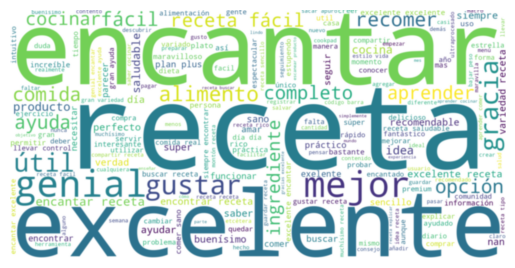

In [35]:
cloud=WordCloud(width=2000,height=1000,background_color='white').generate(" ".join(datos['Rplicacion_Clean']))
plt.imshow(cloud,interpolation='bicubic')
plt.axis('off')
plt.show()

In [36]:
datos.to_csv('datosemp.csv')



##Análisis de correspondencia

In [155]:
atributos_list=["recomendable","fácil","útil","premium","saludable","variedad"]

In [190]:
correspondencia=pd.read_csv('/content/datosemp.csv')

In [191]:
correspondencia=correspondencia[['Aplicacion','Rplicacion_Clean']]

In [192]:
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('facil','fácil',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('sano','saludable',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('salud','saludable',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('como saludable','saludable',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('aprender comer','saludable',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('comer sano','saludable',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('vida saludable','saludable',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('receta saludable','saludable',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('practico','fácil',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('sencillo','fácil',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('sencilla','fácil',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('práctico','fácil',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('intuitivo','fácil',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('plan plus','premium',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('pagar','premium',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('pago','premium',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('plus','premium',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('gran variedad','variedad',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('variedad receta','variedad',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('saber','variedad',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('idea','variedad',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('información','variedad',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('encontrar receta','variedad',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('variado','variedad',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('recomendado','recomendable',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('encantar','excelente',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('bajar peso','dieta',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('completo','variedad',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('aprender','variedad',regex=True)
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].replace('´cocinarfácil','fácil',regex=True)

In [193]:
correspondencia.head()

,Aplicacion,Rplicacion_Clean
0,Cookpad,maravilloso ayudado
1,Cookpad,gustar guardar propio receta así volver varied...
2,Cookpad,receta rico
3,Cookpad,siempre encontrar variedad
4,Cookpad,NaN


In [194]:
def atributos(x):
  for word in word_tokenize(x):
    if word in (atributos_list):
      return word
    else:
      return np.nan

In [195]:
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].astype(str)

In [196]:
correspondencia['Rplicacion_Clean']=correspondencia['Rplicacion_Clean'].apply(lambda x: atributos(x))

In [197]:
correspondencia.head()

,Aplicacion,Rplicacion_Clean
0,Cookpad,NaN
1,Cookpad,NaN
2,Cookpad,NaN
3,Cookpad,NaN
4,Cookpad,NaN


In [198]:
correspondencia.dropna(inplace=True)

In [199]:
correspondencia.shape

(1851, 2)

In [200]:
tabla=pd.crosstab(index=correspondencia['Aplicacion'],columns=correspondencia['Rplicacion_Clean'])

In [201]:
tabla

Rplicacion_Clean,fácil,premium,recomendable,saludable,variedad,útil
Aplicacion,,,,,,
Cookpad,167,3,24,0,314,176
My Recipe Box : Recette Tek,26,0,1,0,1,25
MyFitnessPal,125,3,20,0,109,150
MyrealFood: Recetas y dietas,93,14,34,17,166,202
Nestlé Cocina. Recetas y Menús,29,0,1,0,47,21
Plan Meals - Meal Planner,1,0,0,0,0,1
Recipe Keeper,1,0,1,0,0,1
Samsung Food,5,0,0,0,2,4
Tasty,5,0,0,0,7,4


In [202]:
ca=prince.CA(n_components=2)

In [203]:
ca=ca.fit(tabla)

In [204]:
ca.scree_plot()

alt.Chart(...)

In [205]:
ca.plot(tabla,show_column_labels=True,show_row_labels=True)

alt.LayerChart(...)

In [206]:
ca.percentage_of_variance_.sum()

91.15675573775988

In [207]:
ca.column_coordinates(tabla).to_excel('colum.xlsx')##coordenadas columnas

In [208]:
ca.row_coordinates(tabla).to_excel('row.xlsx')#coordenadas fila